In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Adimin\Downloads\archive\E-commerce Customer Behavior - Sheet1.csv")

In [3]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
df.tail()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [6]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [7]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['Gender'].value_counts().reset_index()

,index,Gender
0,Male,175
1,Female,173


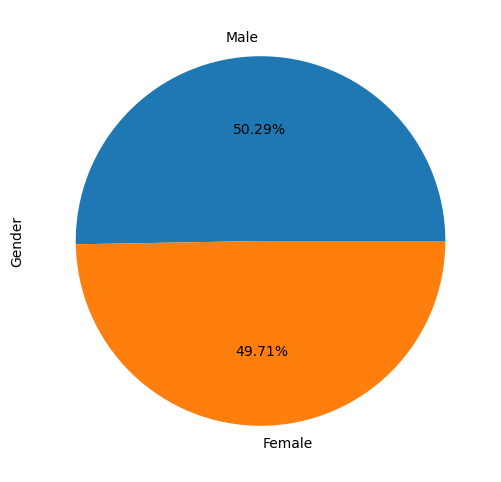

In [11]:
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

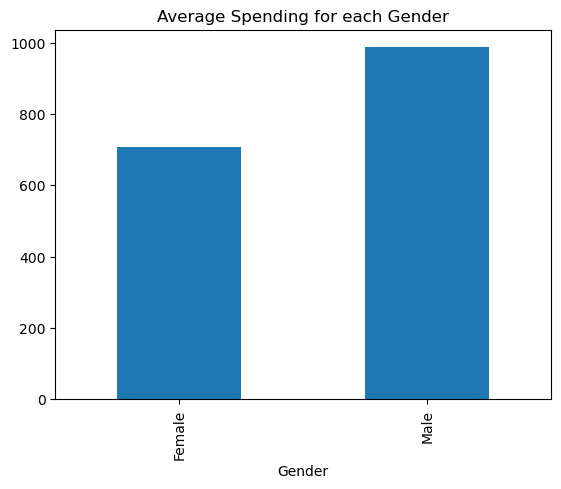

In [12]:
gender_spend = df.groupby('Gender')['Total Spend'].mean()
gender_spend.plot.bar()
plt.title("Average Spending for each Gender")
plt.show()

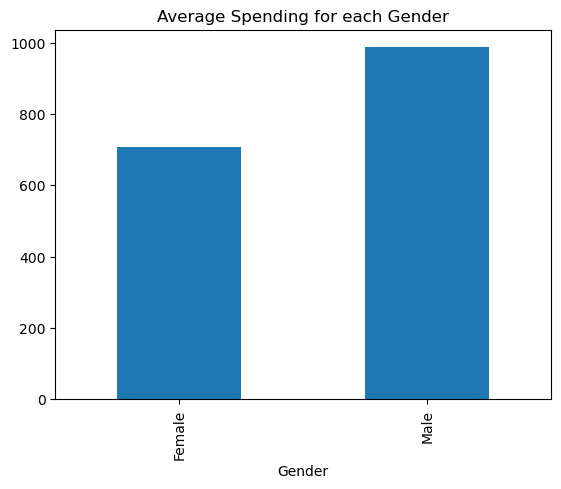

In [17]:
gender_spend = df.groupby('Gender')['Total Spend'].mean()
gender_spend.plot.bar()
plt.title("Average Spending for each Gender")
plt.show()

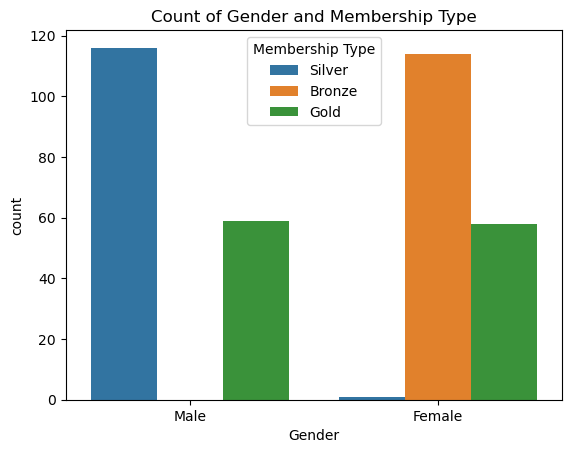

In [19]:
gender_membership = df[['Gender', 'Membership Type']].value_counts().reset_index(name='count')
sns.barplot(data=gender_membership, x='Gender', y='count', hue='Membership Type')
plt.title("Count of Gender and Membership Type")
plt.show()

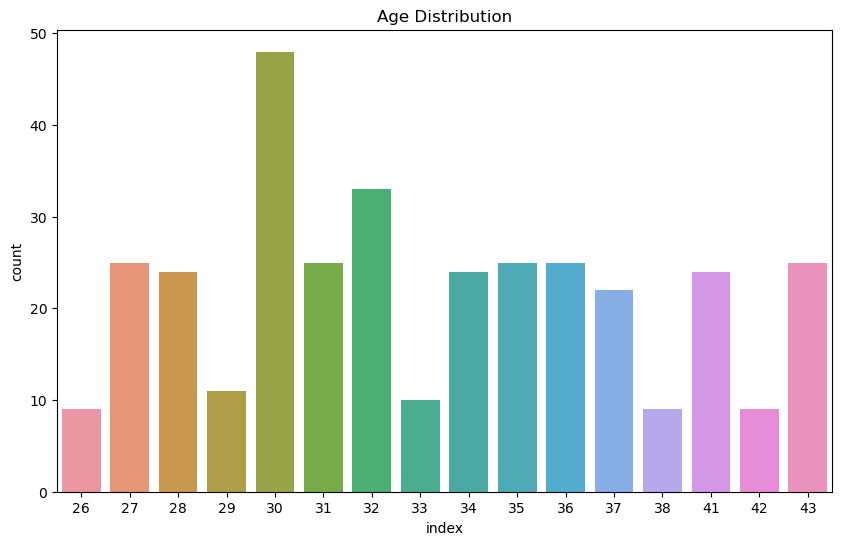

In [20]:
age_data = df['Age'].value_counts().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=age_data, x='index', y='count')
plt.title("Age Distribution")
plt.show()

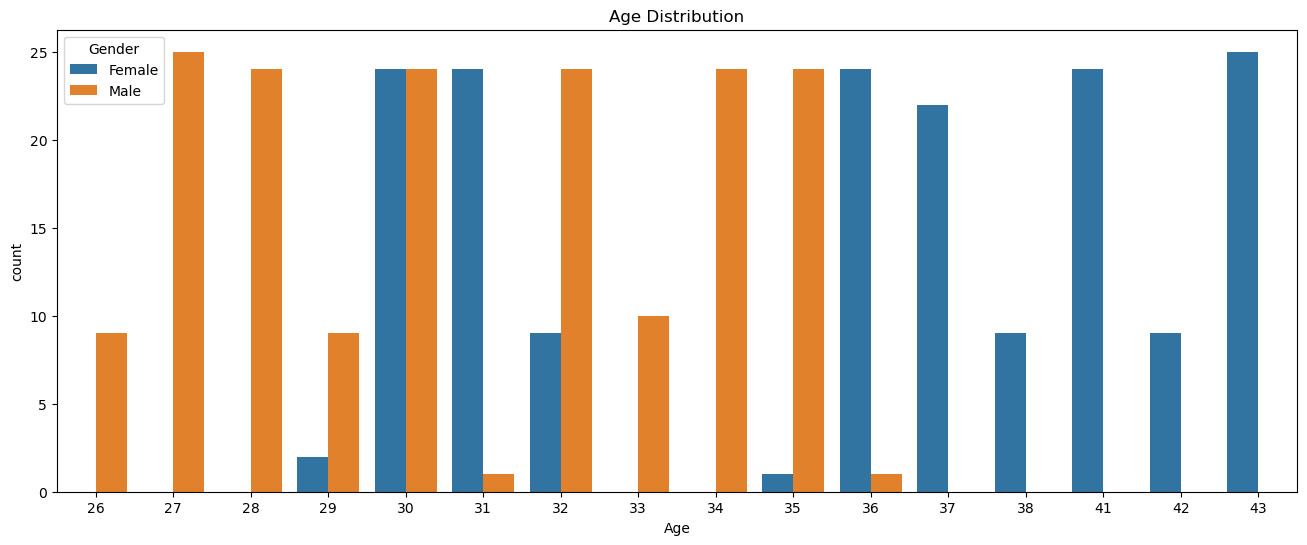

In [23]:
gender_age_data = df[['Gender', 'Age']].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)
plt.figure(figsize=(16, 6))
sns.barplot(data=gender_age_data, x='Age', y='count', hue='Gender')
plt.title("Age Distribution")
plt.show()

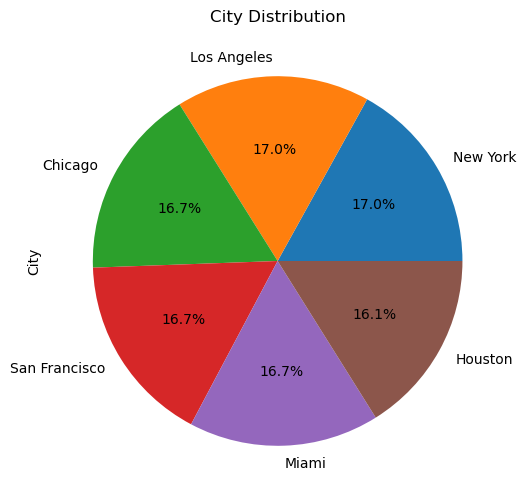

In [25]:
plt.figure(figsize=(10, 6))
df['City'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("City Distribution")
plt.show()

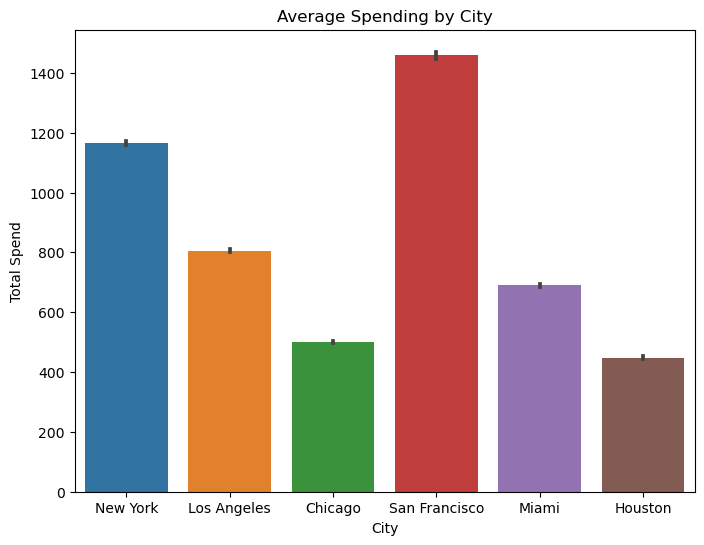

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='City', y='Total Spend')
plt.title("Average Spending by City")
plt.show()

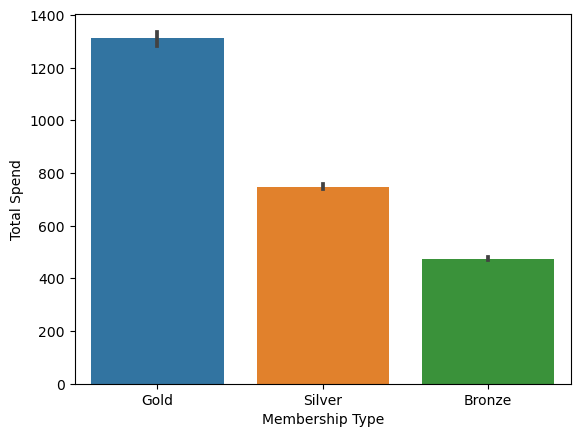

In [27]:
sns.barplot(data=df, x='Membership Type', y='Total Spend')
plt.show()

In [28]:
age_grp=['21-30','31-43']
df['age_group'] = pd.cut(df.Age,bins=np.arange(15,46,15),labels=age_grp,right=True)
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,age_group
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,21-30
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,31-43
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,31-43
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,21-30
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,21-30


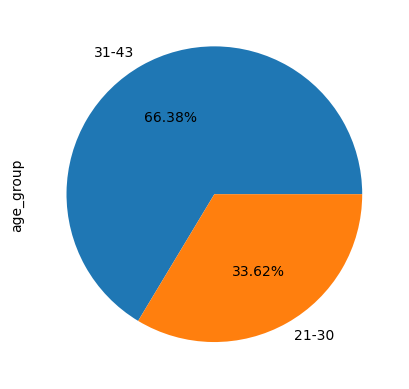

In [29]:
df['age_group'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

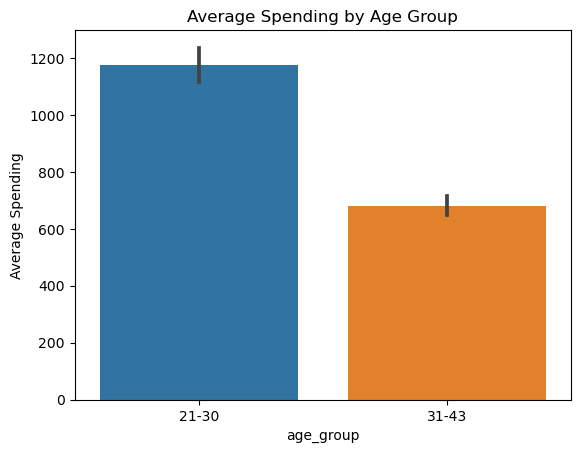

In [30]:
sns.barplot(data=df, x='age_group', y='Total Spend')
plt.ylabel('Average Spending')
plt.title('Average Spending by Age Group')
plt.show()

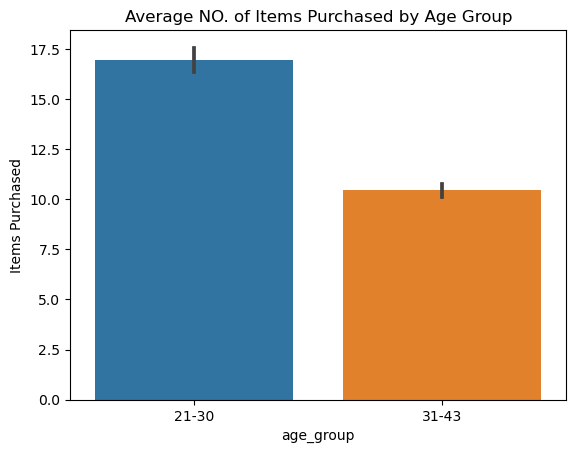

In [31]:
sns.barplot(data=df, x='age_group', y='Items Purchased')
plt.title('Average NO. of Items Purchased by Age Group')
plt.show()

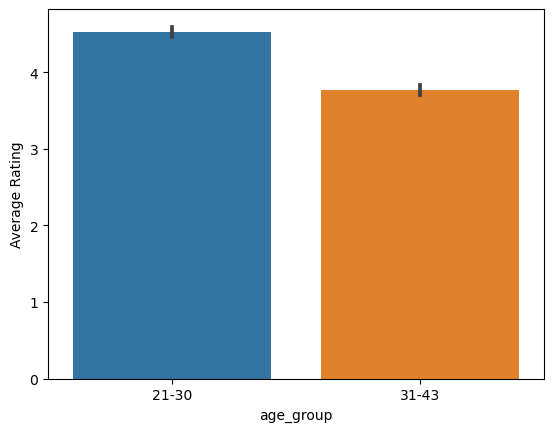

In [32]:
sns.barplot(data=df, x='age_group', y='Average Rating')
plt.show()

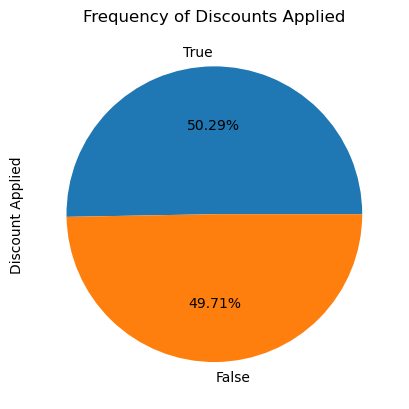

In [33]:
df['Discount Applied'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title("Frequency of Discounts Applied")
plt.show()

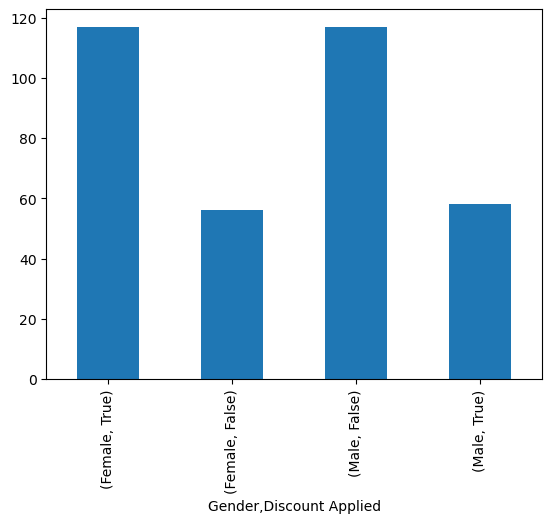

In [34]:
gender_discount = df.groupby('Gender')['Discount Applied'].value_counts()
gender_discount.plot.bar()
plt.show()

<Axes: xlabel='age_group,Discount Applied'>

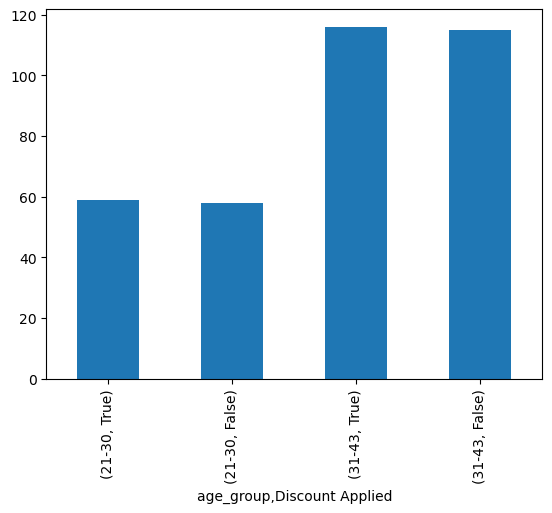

In [35]:
age_group_discount = df.groupby('age_group')['Discount Applied'].value_counts()
age_group_discount.plot.bar()

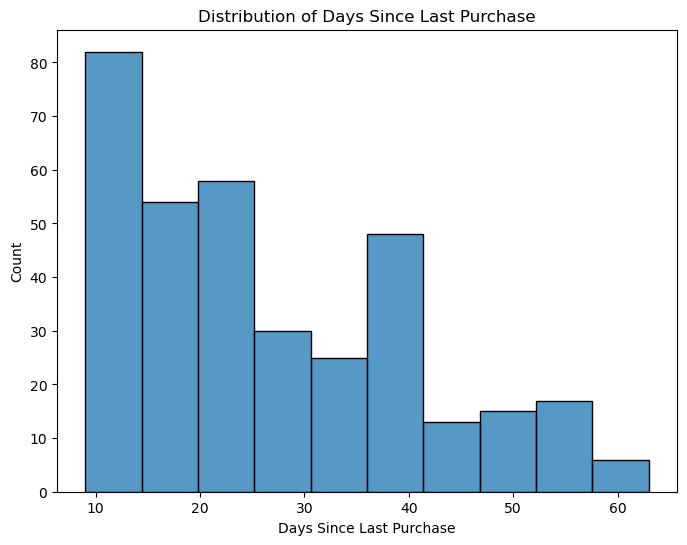

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Days Since Last Purchase'])
plt.title("Distribution of Days Since Last Purchase")
plt.show()

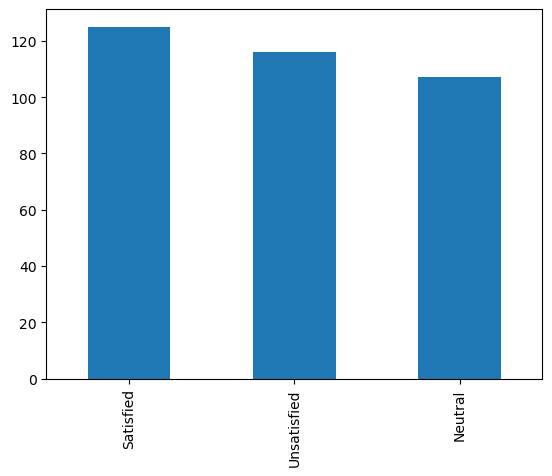

In [37]:
df['Satisfaction Level'].value_counts().plot.bar()
plt.show()

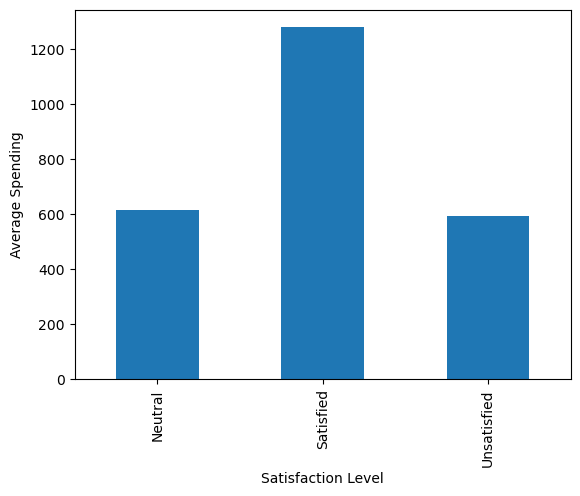

In [38]:
satisfaction_spend = df.groupby('Satisfaction Level')['Total Spend'].mean()
satisfaction_spend.plot.bar()
plt.ylabel('Average Spending')
plt.show()

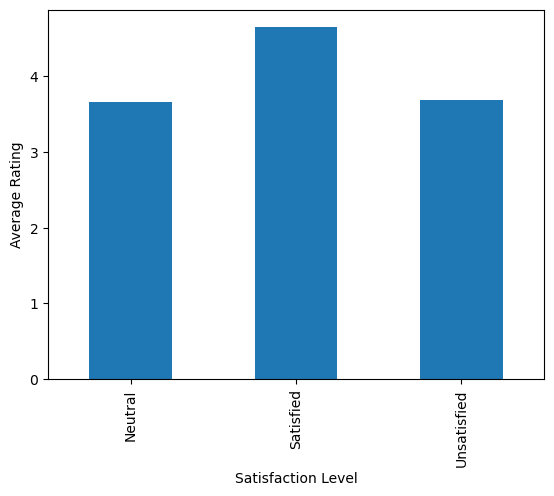

In [39]:
satisfaction_rating = df.groupby('Satisfaction Level')['Average Rating'].mean()
satisfaction_rating.plot.bar()
plt.ylabel('Average Rating')
plt.show()

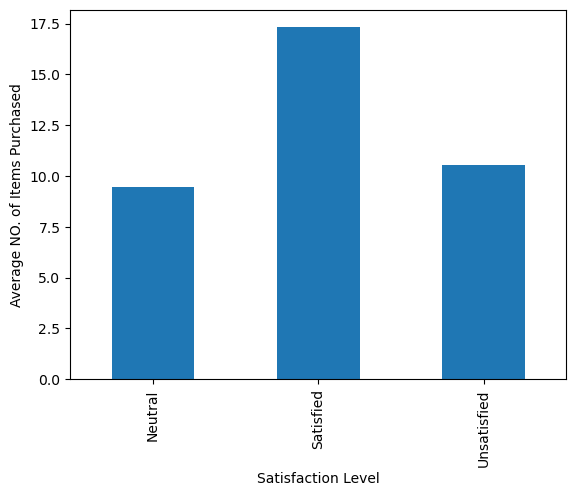

In [40]:
satisfaction_items = df.groupby('Satisfaction Level')['Items Purchased'].mean()
satisfaction_items.plot.bar()
plt.ylabel('Average NO. of Items Purchased')
plt.show()